In [22]:
%matplotlib inline

import xgboost as xgb
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime
from sklearn.model_selection import learning_curve

In [3]:
data = load_boston()

In [4]:
X = data.data
y = data.target

In [49]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

In [6]:
reg = XGBR(n_estimators=100).fit(Xtrain, Ytrain)

In [7]:
reg.predict(Xtest)

array([ 6.6689262, 22.34918  , 31.052807 , 13.911595 ,  9.467966 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779037 ,
       37.13194  , 20.133305 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165182 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666289 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [8]:
# 对 xgboost 不算好
reg.score(Xtest, Ytest)

0.9050988968414799

In [9]:
MSE(Ytest, reg.predict(Xtest))

8.830916343629323

In [10]:
reg.feature_importances_

array([0.01902167, 0.0042109 , 0.01478317, 0.00553536, 0.02222195,
       0.37914094, 0.01679687, 0.04698721, 0.04073574, 0.05491758,
       0.0668422 , 0.00869463, 0.32011184], dtype=float32)

In [11]:
# 交叉验证

reg = XGBR(n_estimators=100)
CVS(reg, Xtrain, Ytrain, cv=5).mean()

0.7995062821902295

In [14]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.215644229762717

In [15]:
CVS(reg,Xtrain,Ytrain,cv=5,scoring='r2').mean()

0.7995062821902295

In [16]:
rfr = RFR(n_estimators=100)
CVS(rfr, Xtrain, Ytrain, cv=5).mean()

0.8022231829398153

In [19]:
CVS(rfr, Xtrain, Ytrain, cv=5, scoring="neg_mean_squared_error").mean()

-16.382938565955733

In [17]:
lr = LinearR()
CVS(lr, Xtrain, Ytrain, cv=5).mean()

0.6835070597278079

In [20]:
CVS(lr, Xtrain, Ytrain, cv=5, scoring="neg_mean_squared_error").mean()

-25.349507493648463

In [21]:
reg = XGBR(n_estimators=10,silent=False)
CVS(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

[14:03:54] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:03:54] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:03:54] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:03:54] WARNING: ..

-18.633733952333067

In [29]:
# 训练样本量的学习曲线

def plot_learning_curve(estimator, title, X, y
                        ,ax=None
                        ,ylim=None
                        ,cv=None
                        ,n_jobs=None
                       ):
    
    train_sizes, train_scores, test_scores = learning_curve(estimator
                                                           ,X, y
                                                           ,shuffle=True
                                                           ,cv=cv
                                                           ,n_jobs=n_jobs
                                                          )
    
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(train_sizes, np.mean(train_scores, axis=1)
            ,"o-"
            ,color="r"
            ,label="Training Score"
           )
    ax.plot(train_sizes, np.mean(test_scores, axis=1), "o-"
            ,color="g"
            ,label="test score"
           )
    ax.legend(loc="best")
    return ax


<AxesSubplot:title={'center':'XGB'}, xlabel='Training examples', ylabel='Score'>

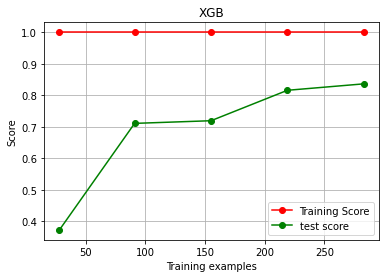

In [50]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
plot_learning_curve(XGBR(n_estimators=100), "XGB", Xtrain, Ytrain, ax=None, cv=cv)

160 0.8320776498992342


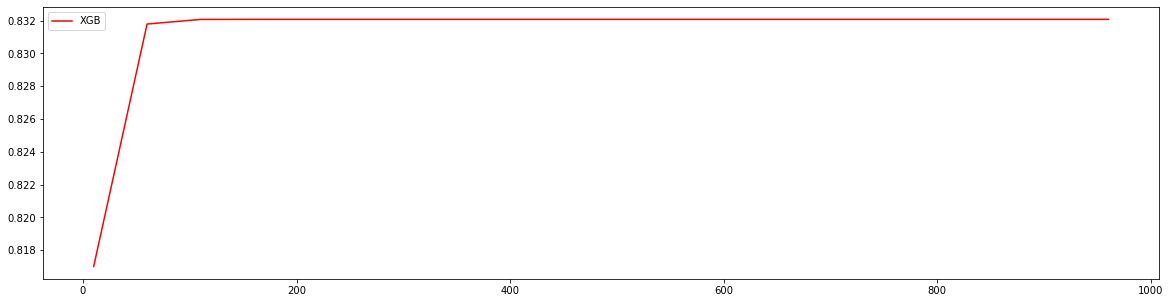

In [51]:
axisx = range(10, 1010, 50)

rs = []

for i in axisx:
    reg = XGBR(n_estimators=i, random_state=420)
    rs.append(CVS(reg, Xtrain, Ytrain, cv=cv).mean())

print(axisx[rs.index(max(rs))], max(rs))
plt.figure(figsize=(20, 5))
plt.plot(axisx, rs, c="red", label="XGB")
plt.legend()
plt.show()

160 0.8320776498992342 0.005351395694609409
10 0.8170020274778438 0.0024782856939611353
160 0.8320776498992342 0.005351395694609409 0.03354931135797358


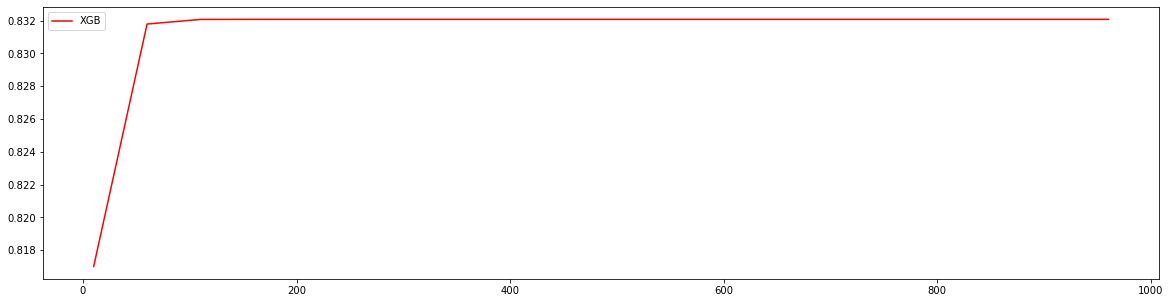

In [52]:
# 进化学习曲线

axisx = range(10, 1010, 50)

rs = []
var = []
ge = []

for i in axisx:
    reg = XGBR(n_estimators=i, random_state=420)
    cvresult = CVS(reg, Xtrain, Ytrain, cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean()) ** 2 + cvresult.var())

print(axisx[rs.index(max(rs))], max(rs), var[rs.index(max(rs))])
print(axisx[var.index(min(var))], rs[var.index(min(var))], min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20, 5))
plt.plot(axisx, rs, c="red", label="XGB")
plt.legend()
plt.show()

90 0.8320824488236443 0.005347131644346341
90 0.8320824488236443 0.005347131644346341
90 0.8320824488236443 0.005347131644346341 0.03354343563741036


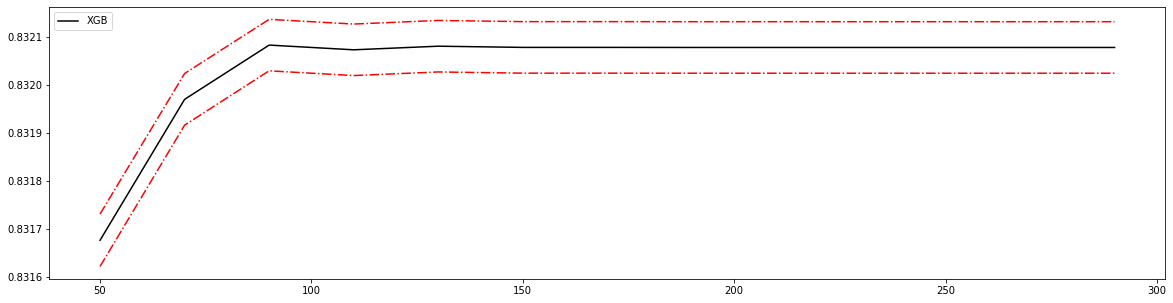

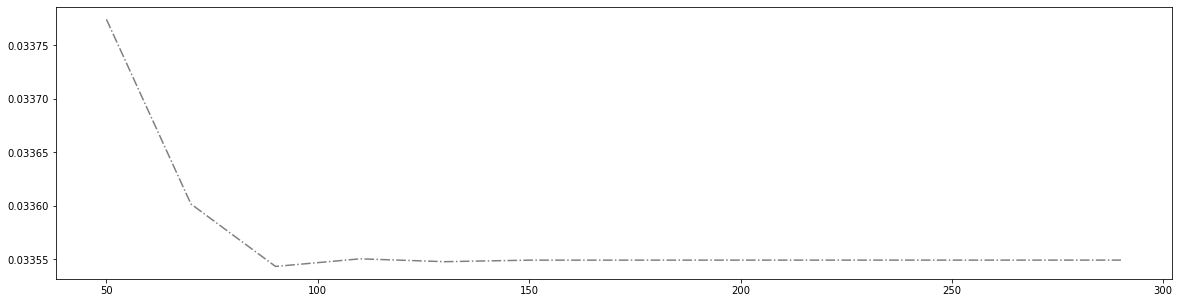

In [53]:
axisx = range(50, 300, 20)

rs = []
var = []
ge = []

for i in axisx:
    reg = XGBR(n_estimators=i, random_state=420)
    cvresult = CVS(reg, Xtrain, Ytrain, cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean()) ** 2 + cvresult.var())

print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))

rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")

#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

#看看泛化误差的可控部分如何?
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

In [54]:
# 模型效果

time0 = time()
print(XGBR(n_estimators=90,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)


0.9051365629901571
0.13335585594177246


In [55]:
time0 = time()
print(XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050526026617368
0.15544557571411133


In [56]:
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050988968414799
0.13697600364685059


1.0 0.8320824488236443


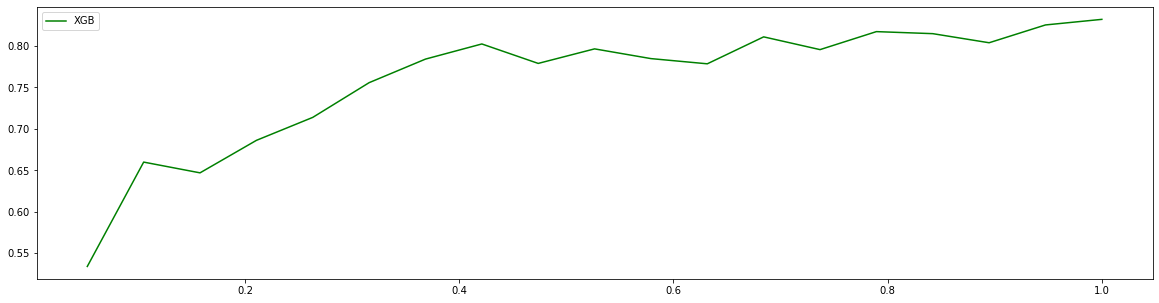

In [62]:
# 参数 subsample

axisx = np.linspace(0, 1, 20)[1:]

rs = []

for i in axisx:
    reg = XGBR(n_estimators=90, subsample=i, random_state=420)
    rs.append(CVS(reg, Xtrain, Ytrain, cv=cv).mean())
    
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

In [63]:
def regassess(reg, Xtrain, Ytrain, cv, scoring=["r2"], show=True):
    """
    评分函数
    """
    score = []
    
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i]
                                     ,CVS(reg
                                          ,Xtrain
                                          ,Ytrain
                                          ,cv=cv
                                          ,scoring=scoring[i]
                                         ).mean()
                                    ))
        score.append(CVS(reg, Xtrain, Ytrain, cv=cv, scoring=scoring[i]).mean())
    return score



In [65]:
regassess(reg, Xtrain, Ytrain, cv, scoring=["r2", "neg_mean_squared_error"])

r2:0.83
neg_mean_squared_error:-12.11


[0.8320824488236443, -12.108534568749251]

In [66]:
regassess(reg, Xtrain, Ytrain, cv, scoring=["r2", "neg_mean_squared_error"], show=False)

[0.8320824488236443, -12.108534568749251]

In [67]:
# eta 如何影响模型

for i in [0, 0.2, 0.5, 1]:
    time0 = time()
    reg = XGBR(n_estimators=90, random_state=420, learning_rate=i)
    print("learning rate = {}".format(i))
    regassess(reg, Xtrain, Ytrain, cv, scoring=["r2", "neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time() - time0).strftime("%M:%S:%f"))
    print("\t")

learning rate = 0
r2:-6.76
neg_mean_squared_error:-567.55
00:00:741068
	
learning rate = 0.2
r2:0.83
neg_mean_squared_error:-12.30
00:00:908117
	
learning rate = 0.5
r2:0.82
neg_mean_squared_error:-12.48
00:00:813471
	
learning rate = 1
r2:0.71
neg_mean_squared_error:-20.06
00:00:545532
	


In [69]:
# 参数 booster

for booster in ["gbtree", "gblinear", "dart"]:
    reg = XGBR(n_estimators=90
               ,eta=0.1
               ,random_state=420
               ,booster=booster
              ).fit(Xtrain, Ytrain)
    print(booster)
    print(reg.score(Xtest, Ytest))
    


gbtree
0.9255594923393885
gblinear
0.5804808295069938
dart
0.9255594784814667


In [86]:
# 参数 objective

reg = XGBR(n_estimators=90, random_state=420).fit(Xtrain, Ytrain)
reg.score(Xtest, Ytest)

0.9051365629901571

In [87]:
MSE(Ytest, reg.predict(Xtest))

8.827411362160364

In [71]:
# 直接用 xgb 库

dtrain = xgb.DMatrix(Xtrain, Ytrain)
dtest = xgb.DMatrix(Xtest, Ytest)

In [72]:
# 无法打开看，因此经常先传入 df 查看再转换为 DMatrix
dtrain

In [73]:
dtest

In [88]:
param = {"silent": False
         ,"objective": "reg:squarederror"
         ,"eta":0.1
        }

In [89]:
num_round = 180
bst = xgb.train(param, dtrain, num_round)

[16:55:36] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [81]:
from sklearn.metrics import r2_score

In [82]:
r2_score(Ytest, bst.predict(dtest))

0.9260984369386971

In [84]:
MSE(Ytest, bst.predict(dtest))

6.876827553497432

0.8 0.840869937975637 0.005891402581053541
4.55 0.8270850835330702 0.004605425533747813
0.6000000000000001 0.8398453482504387 0.004660990862047279 0.030310503339070552


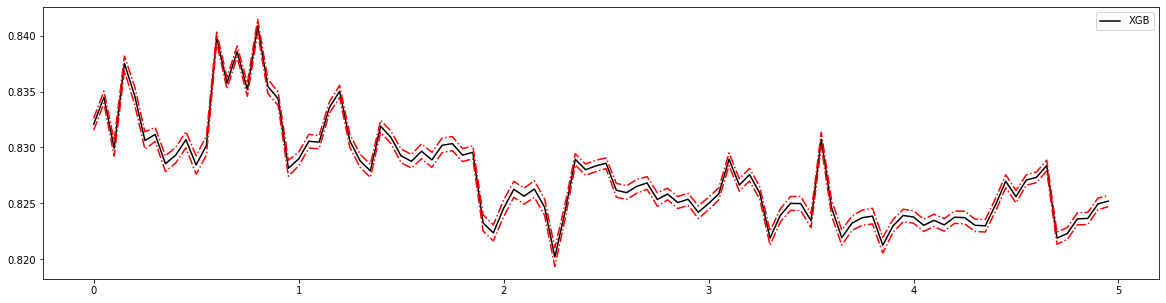

In [91]:
axisx = np.arange(0, 5, 0.05)
rs = []
var = []
ge = []

for i in axisx: 
    reg = XGBR(n_estimators=180, random_state=420, gamma=i)
    result = CVS(reg, Xtrain, Ytrain, cv=cv)
    rs.append(result.mean())
    var.append(result.var())
    ge.append((1 - result.mean()) ** 2 + result.var())

print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.1
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [92]:
dfull = xgb.DMatrix(X, y)

In [105]:
param1 = {'objective':'reg:squarederror',"gamma":0}
num_round = 180
n_fold = 5

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round, n_fold)
print(print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f")))

00:00:385865
None


In [106]:
cvresult1

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.105578,0.129116,17.163215,0.584297
1,12.337973,0.097557,12.519735,0.473458
2,8.994071,0.065756,9.404534,0.472310
3,6.629481,0.050323,7.250335,0.500342
4,4.954406,0.033209,5.920812,0.591874
...,...,...,...,...
175,0.001299,0.000289,3.669898,0.857676
176,0.001285,0.000261,3.669897,0.857678
177,0.001275,0.000239,3.669903,0.857669
178,0.001263,0.000217,3.669901,0.857672


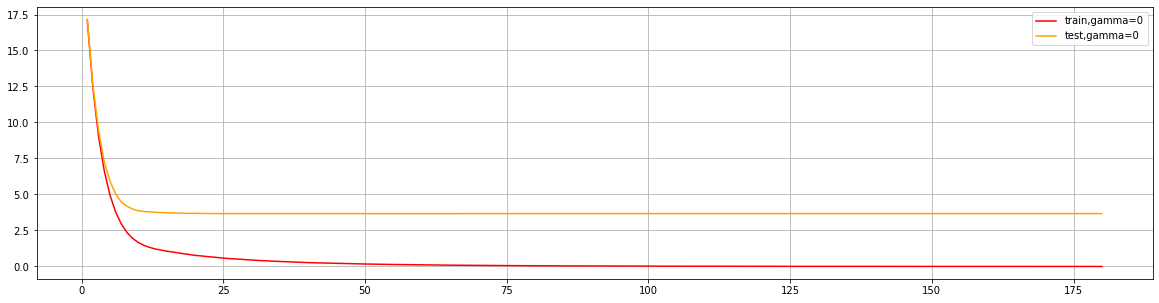

In [107]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

In [111]:
param1 = {'objective':'reg:squarederror',"gamma":0}
param2 = {'objective':'reg:squarederror',"gamma":20}
num_round = 180
n_fold=5
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round,n_fold)

00:00:389441


00:09:079666


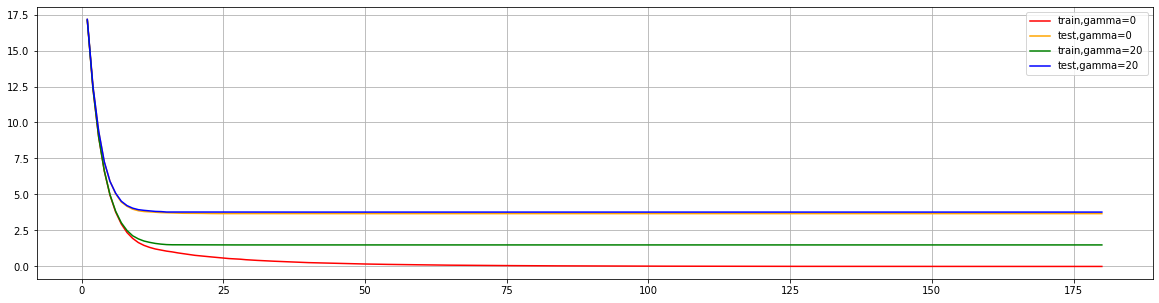

In [112]:
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,181),cvresult2.iloc[:,0],c="green",label="train,gamma=20")
plt.plot(range(1,181),cvresult2.iloc[:,2],c="blue",label="test,gamma=20")
plt.legend()
plt.show()

In [119]:
# 模型的保存和调用

In [120]:
import pickle

In [121]:
dtrain = xgb.DMatrix(Xtrain, Ytrain)

In [127]:
#设定参数,对模型进行训练
param = {'objective':'reg:squarederror'
         ,"subsample":1
         ,"eta":0.05
         ,"gamma":20
         ,"lambda":3.5
         ,"alpha":0.2
         ,"max_depth":4
         ,"colsample_bytree":0.4
         ,"colsample_bylevel":0.6
         ,"colsample_bynode":1
        }

num_round = 180

bst = xgb.train(param, dtrain, num_round)

In [128]:
pickle.dump(bst, open("xgboostonboston.dat","wb"))

In [129]:
import sys
sys.path

['/home/ppp/anaconda3/envs/python-3.6/lib/python36.zip',
 '/home/ppp/anaconda3/envs/python-3.6/lib/python3.6',
 '/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/lib-dynload',
 '',
 '/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages',
 '/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/IPython/extensions',
 '/home/ppp/.ipython']

In [131]:
model = pickle.load(open("xgboostonboston.dat", "rb"))

In [132]:
ypreds = model.predict(dtest)
MSE(Ytest, ypreds)

8.997421310035538